In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
wb = pd.read_csv('world_bank.csv', index_col=0)
wb

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,S. America,Guyana,87.0,81.0,NaN,NaN,92.0,94.0,82.0,87.0,...,76.0,84.0,99.0,95.0,84.0,29.0,7.4,7.4,69.0,80.0
189,S. America,Paraguay,89.0,90.0,71.0,77.0,99.0,98.0,96.0,94.0,...,52.0,89.0,83.0,93.0,NaN,NaN,NaN,NaN,71.0,87.0
190,S. America,Peru,99.0,100.0,84.0,87.0,99.0,99.0,97.0,90.0,...,53.0,76.0,92.0,90.0,60.0,57.0,NaN,NaN,87.0,80.0
191,S. America,Suriname,90.0,99.0,36.0,65.0,98.0,99.0,95.0,94.0,...,NaN,79.0,94.0,89.0,76.0,61.0,43.4,0.0,77.0,80.0


In [3]:
wb = wb.rename(columns={'Antiretroviral therapy coverage: % of people living with HIV: 2015':"HIV rate",
                       'Gross national income per capita, Atlas method: $: 2016':'gni'})
wb.head()

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


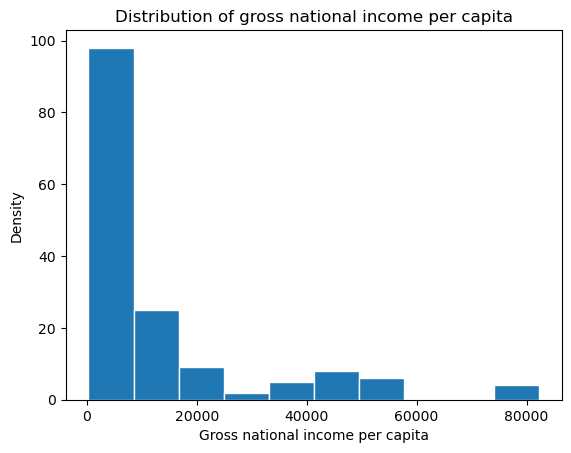

In [4]:
plt.hist(wb['gni'],edgecolor='white')
plt.xlabel("Gross national income per capita")
plt.ylabel("Density")
plt.title("Distribution of gross national income per capita");
plt.show()

Text(0.5, 1.0, 'gross income')

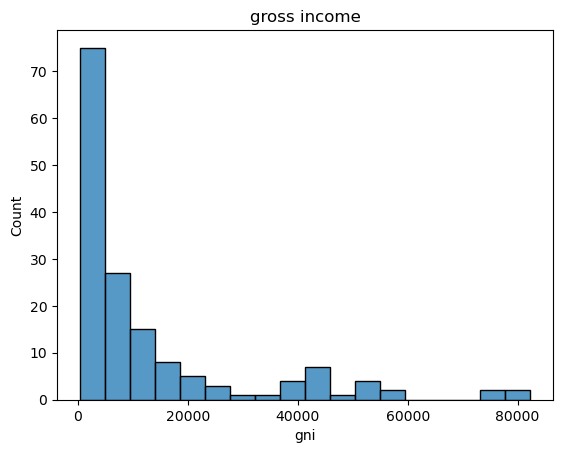

In [5]:
sns.histplot(wb['gni'])
plt.title('gross income')

Text(0.5, 1.0, '5 bins for gani')

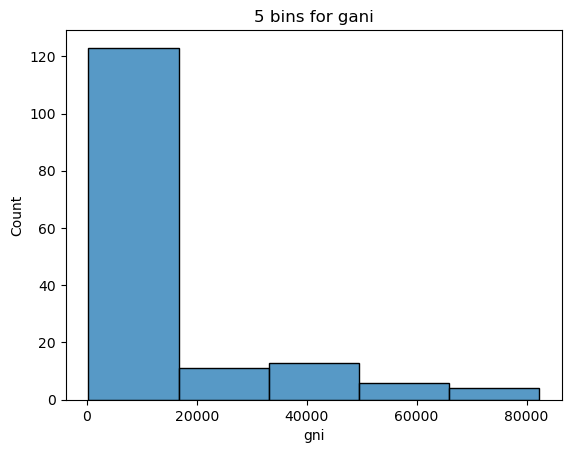

In [6]:
sns.histplot(wb['gni'],bins=5)
plt.title('5 bins for gani')

Text(0.5, 1.0, '5 bins hiv rate')

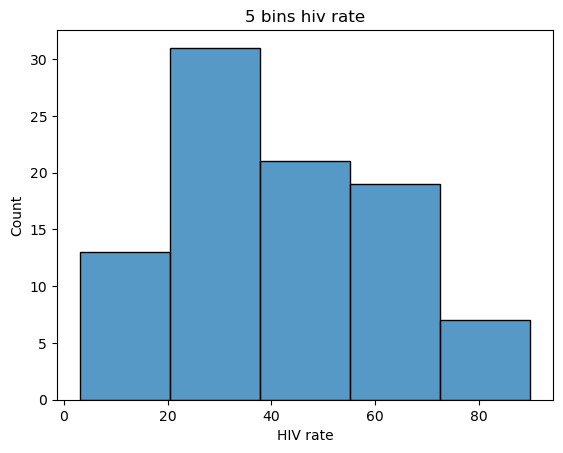

In [7]:
sns.histplot(wb['HIV rate'],bins=5)
plt.title('5 bins hiv rate')

<Axes: xlabel='gni', ylabel='Count'>

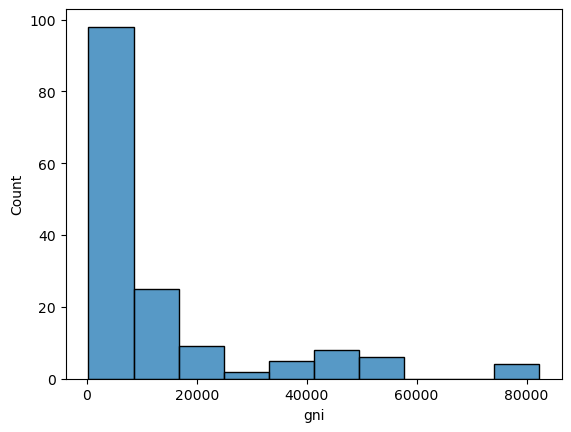

In [8]:
sns.histplot(x='gni',bins=10,data=wb)


In [9]:
north = ["Asia", "Europe", "N. America"]
south = ["Africa", "Oceania", "S. America"]
wb.loc[wb['Continent'].isin(north),'Hemisphere'] = 'Northern'
wb.loc[wb['Continent'].isin(south),'Hemisphere'] = 'Southern'

Text(0.5, 1.0, 'hemisphere for gani')

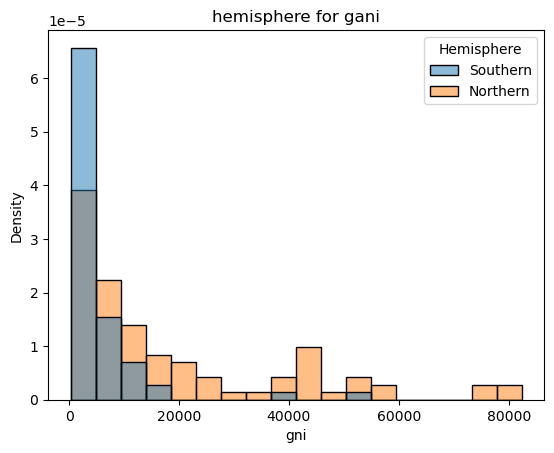

In [10]:
sns.histplot(data=wb,x='gni',hue='Hemisphere',stat='density')
plt.title('hemisphere for gani')

In [11]:
box1=[34,54,56,76]
box2=[56,45,23,55]

In [12]:
def iou(box1,box2):
    box1_area = abs(box1[2]-box1[0])*abs(box1[3]-box1[1])
    box2_area = abs(box2[2]-box2[0])*abs(box2[3]-box2[1])
    
    ix1= max(box1[0],box2[0])
    iy1= max(box1[1],box2[1])
    ix2= min(box1[2],box2[2])
    iy2= min(box1[3],box2[2])
    
    inter_area = abs(ix2-ix1)*abs(iy2-iy1)
    union_area = box1_area+box2_area-inter_area
    output = inter_area/union_area
    return output


In [13]:
iou(box2,box1)

0.04225352112676056